In [1]:
import numpy as np
np.random.seed(42)
np.set_printoptions(suppress=True)
from scipy.optimize import least_squares, curve_fit
from matplotlib import pylab as plt
import pandas as pd
import glob
import time
from tqdm.notebook import tqdm
import os
import random

import warnings
from scipy.optimize import OptimizeWarning
warnings.simplefilter("error", OptimizeWarning)

# import seaborn as sns
# sns.set()

In [2]:
def plot_allbands_df(df,title=None,ax=plt):
    ugrizYcolors = ["violet","green","red","darkred","grey","black"]
    for i,band in enumerate("ugrizY"):
        subdf = df[df["band"]==band].reset_index(drop=True)
        x = subdf["mjd"]
        y = subdf["flux"]
        yerr = subdf["fluxerr"]
#         ax.errorbar(x,y,yerr=yerr,ls = "None",color=ugrizYcolors[i])
        ax.scatter(x,y,s=1.2,label=band,color=ugrizYcolors[i])
        if title is not None:
            if ax is not plt:
                ax.set_title(title)
            else:
                ax.title(title)
    return ax

In [3]:
filels = glob.glob("csv_data/*.csv")

In [4]:
# df = pd.read_csv("csv_data/122615_TDE.csv")

In [5]:
def give_detected_info(file,mismatchdict={},plot=False,print_errratiolessthan5=False,print_mismatchcount=False,
                      print_imaxmjdmax=False):
    title=file.split("/")[-1]
    title_class = title.split("_")[-1].split(".")[0]
    if title_class not in mismatchdict.keys():
        mismatchdict[title_class] = 0
    
    df = pd.read_csv(file)
    df["mjd"] = df["mjd"] - df["mjd"][0]
    imax = abs(df["flux"]/df["fluxerr"]).argmax()
    
    if print_errratiolessthan5 and abs(df["flux"]/df["fluxerr"]).max() < 5:
        print(title)
    
    mjdmax = df["mjd"][imax]
    if print_imaxmjdmax:
        print(f"imax = {imax}\nmjdmax={mjdmax}")
    df["sid_bool"]=0
    df.loc[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+120),"sid_bool"] = 1
    mismatch_count = len(df.loc[df["detected_bool"] - df["sid_bool"] == 1])

    if mismatch_count > 0:
        mismatchdict[title_class] = mismatchdict[title_class] + 1
        if print_mismatchcount:
            print(f"Mismatch Count = {mismatch_count} for {file.split('/')[-1]}")
    
    if plot:
        subdf = df[df["sid_bool"] == 1].reset_index(drop=True)
        f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
        x = df["mjd"]
        y = df["flux"]
        ax1.scatter(x,y,s=1.2)
        plot_allbands_df(subdf,ax=ax2,title=title)

        plt.suptitle(file.split("/")[-1])
        plt.show()
    return mismatchdict

In [6]:
mismatchdict={}
for file in filels:
    mismatchdict = give_detected_info(file,mismatchdict,print_mismatchcount=True)
#     mismatchdict = give_detected_info(file,mismatchdict,print_errratiolessthan5=True)    

Mismatch Count = 2 for 30998_SLSN-I.csv
Mismatch Count = 121 for 231183_AGN.csv
Mismatch Count = 5 for 211276_TDE.csv
Mismatch Count = 77 for 295853_AGN.csv
Mismatch Count = 6 for 111076_AGN.csv
Mismatch Count = 65 for 311198_AGN.csv
Mismatch Count = 1 for 284917_SNIa.csv
Mismatch Count = 1 for 339740_TDE.csv
Mismatch Count = 75 for 272103_AGN.csv
Mismatch Count = 20 for 168034_SLSN-I.csv
Mismatch Count = 3 for 53377_SLSN-I.csv
Mismatch Count = 43 for 209780_AGN.csv
Mismatch Count = 2 for 230350_TDE.csv
Mismatch Count = 3 for 160306_AGN.csv
Mismatch Count = 7 for 321618_AGN.csv
Mismatch Count = 170 for 273648_AGN.csv
Mismatch Count = 111 for 281587_AGN.csv
Mismatch Count = 26 for 107495_AGN.csv
Mismatch Count = 153 for 146937_AGN.csv
Mismatch Count = 41 for 72934_AGN.csv
Mismatch Count = 19 for 23667_AGN.csv
Mismatch Count = 58 for 137797_AGN.csv
Mismatch Count = 33 for 136892_AGN.csv
Mismatch Count = 46 for 175848_AGN.csv
Mismatch Count = 44 for 94074_AGN.csv
Mismatch Count = 24 for 2

In [7]:
mismatchdict

{'SNIa-91bg': 0,
 'SLSN-I': 9,
 'TDE': 5,
 'SNII': 0,
 'AGN': 59,
 'SNIax': 0,
 'SNIa': 1,
 'SNIbc': 0}

In [75]:
print("ratio3bool")
print("Heuristic Criteria is at least 3 observations within 5 days having flux-fluxerr ratio > 2")

print("mjdstart = v.mjd.values[0]")
print("Range: mjdstart - 85 to mjdstart + 25")

ratio3bool
Heuristic Criteria is at least 3 observations within 5 days having flux-fluxerr ratio > 2
mjdstart = v.mjd.values[0]
Range: mjdstart - 85 to mjdstart + 25


In [191]:
for file in random.sample(filels,5):
    fname = file.split("/")[-1]
    df = pd.read_csv(file)
    df["mjd"] = df["mjd"] - df["mjd"][0]
    df["ratio"] = abs(df["flux"]/df["fluxerr"])

    imax = abs(df["flux"]/df["fluxerr"]).argmax()
    
    
    mjdmax = df["mjd"][imax]
    df["sid_bool"]=0
    df.loc[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+120),"sid_bool"] = 1

    subdf_detected = df[df["detected_bool"]==1]
    subdf_ratio2 = df[df["ratio"]>=2]
    subdf_sidbool = df[df["sid_bool"]==1]
    
#     l = len(subdf_detected[subdf_detected["ratio"]<3])
#     if l>0:
#         print(f"{file} - {l}")
    m = subdf_detected["ratio"].min()
    if m<2:
        print(f"{file.split('/')[1]} - {m}")
    

    break

In [192]:
## WIP

In [193]:
df["ratio3bool"] = 0

In [194]:
fname

'198209_SNII.csv'

In [195]:
# https://towardsdatascience.com/pandas-dataframe-group-by-consecutive-certain-values-a6ed8e5d8cc

for k, v in subdf_ratio2[subdf_ratio2["mjd"].diff()<3].groupby((subdf_ratio2["mjd"].diff()>=3).cumsum()):
    if len(v)<3:
        continue
    mjdstart = v.mjd.values[0]
    break

In [196]:
mjdstart

95.6588000000047

In [197]:
subdf_sidbool.mjd.values[0]

9.033699999999953

In [198]:
subdf_sidbool.mjd.values[-1]

139.70230000000447

In [199]:
print(f"MJDStart - SidBoolStart = {mjdstart - subdf_sidbool.mjd.values[0]}")

print(f"SidBoolEnd - MJDStart = {subdf_sidbool.mjd.values[-1] - mjdstart}")

MJDStart - SidBoolStart = 86.62510000000475
SidBoolEnd - MJDStart = 44.04349999999977


In [181]:
df[100:150]

mjd band       flux   fluxerr  detected_bool     ratio  sid_bool  \
100  122.5983    r   0.512491  0.739028              0  0.693466         0   
101  122.6060    g   0.204182  0.755712              0  0.270185         0   
102  122.6137    i   1.981968  1.233523              0  1.606754         0   
103  122.6248    z  -1.887594  1.886823              0  1.000409         0   
104  122.6359    Y   2.145591  4.803004              0  0.446719         0   
105  123.6370    u   1.041903  1.590370              0  0.655132         0   
106  124.6082    u  -0.004399  1.315391              0  0.003344         0   
107  125.6002    u  -0.144445  2.119074              0  0.068164         0   
108  126.6009    u   0.931124  1.597533              0  0.582851         0   
109  127.6017    u  -3.471258  1.624462              0  2.136866         0   
110  128.6019    u  -0.785987  1.666105              0  0.471751         0   
111  129.6029    u   0.006998  1.347225              0  0.005194         0   
112  133.6594    r  -1.040734  1.090760              0  0.954137         0   
113  133.6671    g   2.067729  1.495316              0  1.382804         0   
114  133.6747    i  -0.816047  1.522012              0  0.536163         0   
115  133.6856    z   1.916360  2.008616              0  0.954070         0   
116  133.6966    Y   0.976200  4.884242              0  0.199867         0   
117  136.6069    r   2.248475  1.873311              0  1.200268         0   
118  136.6146    g  -1.709569  2.947272              0  0.580051         0   
119  136.6222    i  -0.705645  2.277288              0  0.309862         0   
120  136.6333    z  -0.741698  2.256835              0  0.328645         0   
121  136.6444    Y  -1.283305  5.352374              0  0.239764         0   
122  367.9934    u   0.460861  1.556314              0  0.296123         0   
123  373.8312    r   2.508260  2.280617              0  1.099816         0   
124  373.8389    g   3.759176  2.933782              0  1.281341         0   
125  373.8466    i  -0.749667  2.501316              0  0.299709         0   
126  373.8578    z  -2.581028  2.976810              0  0.867045         0   
127  373.8689    Y  -9.499102  6.686928              0  1.420548         0   
128  389.8061    u   1.153188  1.875530              0  0.614860         0   
129  390.7996    u  -2.584467  3.532675              0  0.731589         0   
130  391.7973    u   0.012949  3.078948              0  0.004206         0   
131  392.7983    u   2.311728  2.431710              0  0.950659         0   
132  393.7957    u   0.635141  1.927001              0  0.329601         0   
133  394.7894    u  -3.165254  2.416537              0  1.309831         0   
134  402.8045    r  -0.808114  1.381159              0  0.585098         0   
135  402.8122    g   0.194555  1.883882              0  0.103273         0   
136  402.8199    i   2.870125  1.647674              0  1.741925         0   
137  402.8310    z  -0.623277  2.069566              0  0.301163         0   
138  402.8421    Y   1.569466  5.270333              0  0.297793         0   
139  411.7248    r   2.187116  1.884384              0  1.160653         0   
140  411.7325    g  -2.859133  2.591542              0  1.103256         0   
141  411.7402    i  -0.490658  2.765858              0  0.177398         0   
142  411.7513    z   1.199614  3.141511              0  0.381859         0   
143  411.7624    Y  10.665598  7.986380              0  1.335473         0   
144  414.7140    r  -1.002335  0.846985              0  1.183415         0   
145  414.7217    g  -0.103465  0.708162              0  0.146104         0   
146  414.7295    i  -0.833832  1.364934              0  0.610895         0   
147  414.7406    z  -3.918335  2.180906              0  1.796655         0   
148  414.7517    Y   5.378859  5.635670              0  0.954431         0   
149  417.7031    r   0.122253  0.880063              0  0.138914         0   

     ratio3bool  
100          

In [88]:
subdf_detected

mjd band       flux   fluxerr  detected_bool      ratio  sid_bool
235  753.0146    r   9.976359  1.182967              1   8.433337         1
237  753.0298    i  14.042601  1.791472              1   7.838582         1
238  753.0408    z  18.674746  2.638284              1   7.078368         1
240  755.9179    r  22.700884  1.251212              1  18.143116         1
242  755.9331    i  33.724472  1.894314              1  17.803000         1
252  767.9082    r  31.179674  0.949553              1  32.836160         1
253  767.9158    g   5.562253  0.966595              1   5.754481         1
254  767.9234    i  64.173386  1.340594              1  47.869367         1
255  767.9344    z  80.966484  1.930577              1  41.939008         1
256  767.9453    Y  86.196396  4.488158              1  19.205294         1
257  770.9220    r  25.913132  2.023482              1  12.806208         1
259  770.9372    i  55.945602  2.245181              1  24.918081         1
260  770.9481    z  74.886818  2.791778              1  26.824059         1
261  770.9591    Y  79.809364  6.250959              1  12.767539         1
262  779.8780    r   9.806132  0.802356              1  12.221672         1
264  779.8932    i  31.510334  1.252877              1  25.150381         1
265  779.9042    z  43.269485  1.880467              1  23.009968         1
266  779.9151    Y  60.647175  4.559776              1  13.300472         1
267  782.8708    r   9.616465  0.720820              1  13.341007         1
269  782.8860    i  25.744202  1.137546              1  22.631350         1
270  782.8969    z  40.850517  1.719357              1  23.759183         1
271  782.9079    Y  51.488621  4.089903              1  12.589203         1
272  785.8627    r   8.274281  0.626511              1  13.206921         1
274  785.8780    i  22.383427  1.003056              1  22.315232         1
275  785.8889    z  31.558104  1.516084              1  20.815538         1
276  785.8999    Y  38.165131  3.652828              1  10.448105         1
286  795.8816    i  14.864809  1.157685              1  12.840115         1
287  795.8925    z  22.488026  1.734506              1  12.965090         1
291  798.8374    i  14.076871  1.544808              1   9.112376         1
292  798.8483    z  17.323397  2.045141              1   8.470515         1
306  809.8021    i   6.141323  1.568295              1   3.915923         1
307  809.8131    z  14.222499  2.339761              1   6.078612         1
311  814.8056    i   6.954165  1.412818              1   4.922195         1
312  814.8166    z  10.930190  2.101712              1   5.200613         1
324  825.9037    z   8.962708  1.903671              1   4.708118         1

In [89]:
subdf_sidbool

mjd band       flux   fluxerr  detected_bool     ratio  sid_bool
223  729.0316    u  -2.363154  2.000262              0  1.181422         1
224  730.0020    u  -0.964922  1.860131              0  0.518739         1
225  730.9948    u  -0.463483  2.373226              0  0.195297         1
226  731.9901    u  -0.417945  1.730505              0  0.241516         1
227  732.9934    u   0.823524  2.298952              0  0.358217         1
..        ...  ...        ...       ...            ...       ...       ...
345  842.8565    Y  11.185718  5.305787              0  2.108211         1
346  845.8055    u  -3.044081  1.240024              0  2.454857         1
347  846.8093    u  -0.262774  0.893555              0  0.294077         1
348  847.8145    u  -1.504207  1.886519              0  0.797345         1
349  848.8198    u   0.529815  1.837822              0  0.288284         1

[127 rows x 7 columns]

In [69]:
## WIP End

In [14]:
print(f"mjdmax={mjdmax}, imax={imax}, fname={fname}")
df[df["ratio"]>=2][:40]

mjdmax=116.83649999999761, imax=117, fname=29550_SNIa-91bg.csv


mjd band       flux   fluxerr  detected_bool      ratio  sid_bool  \
20    28.9861    Y  -8.237766  3.888727              0   2.118371         1   
22    31.9356    g   7.369951  2.819905              0   2.613546         1   
25    31.9651    Y -10.625107  5.108894              0   2.079727         1   
63    73.8254    r   2.615454  1.183362              0   2.210189         1   
87    90.8097    i   4.802276  2.089530              0   2.298257         1   
92    98.8142    i   3.372937  1.111057              0   3.035791         1   
95   101.8004    r   3.914967  0.775763              1   5.046602         1   
97   101.8156    i  11.312009  1.398503              1   8.088656         1   
98   101.8266    z  11.076047  2.021829              1   5.478231         1   
100  104.8019    r   9.943941  0.668727              1  14.869956         1   
101  104.8095    g   3.085206  0.609740              0   5.059871         1   
102  104.8171    i  15.577624  1.109584              1  14.039157         1   
103  104.8281    z  16.977472  1.847786              1   9.188008         1   
104  104.8463    Y  34.553356  4.734087              1   7.298843         1   
105  107.8032    r  11.413764  0.531666              1  21.467922         1   
106  107.8109    g   2.773463  0.472902              1   5.864773         1   
107  107.8185    i  22.936594  0.868395              1  26.412628         1   
108  107.8344    z  27.479979  1.367385              1  20.096739         1   
109  107.8550    Y  36.003277  3.447907              1  10.442067         1   
115  116.8146    r  11.830217  0.722407              1  16.376111         1   
116  116.8289    g   3.199457  0.726611              0   4.403260         1   
117  116.8365    i  32.264664  1.008154              1  32.003706         1   
118  116.8474    z  45.842060  1.638100              1  27.984897         1   
119  116.8584    Y  40.284863  4.047781              1   9.952333         1   
120  119.8170    r   9.890714  1.435494              1   6.890112         1   
122  119.8322    i  25.782784  1.802524              1  14.303712         1   
123  119.8432    z  43.076664  2.009269              1  21.438973         1   
124  119.8541    Y  49.033073  4.701447              1  10.429358         1   
138  375.9681    u   5.673773  2.570583              0   2.207193         0   
175  438.8116    u   4.576518  2.092899              0   2.186688         0   
258  770.9296    g  -5.879353  2.820420              0   2.084566         0   
263  779.8856    g  -1.889355  0.715099              0   2.642089         0   
275  785.8889    z   4.113976  1.491984              0   2.757386         0   
300  806.7876    g   3.852736  1.349338              0   2.855279         0   
331  836.8851    r   2.696509  1.288936              0   2.092043         0   
348  847.8145    u   5.239260  1.896867              0   2.762060         0   

     ratio3bool  
20            0  
22            0  
25            0  
63            0  
87            0  
92            0  
95            0  
97            0  
98            0  
100           0  
101           0  
102           0  
103           0  
104           0  
105           0  
106           0  
107           0  
108           0  
109           0  
115           0  
116           0  
117           0  
118           0  
119           0  
120           0  
122           0  
123           0  
124           0  
138           0  
175           0  
258           0  
263           0  
275           0  
300           0  
331           0  
348           0

In [66]:
df[0:40]

mjd band       flux   fluxerr  detected_bool     ratio  sid_bool
0    0.0000    r   0.970552  1.359254              0  0.714033         0
1    0.0076    g   0.994088  1.151590              0  0.863231         0
2    0.0152    i   0.333430  1.765269              0  0.188883         0
3    0.0261    z  -0.847185  2.604507              0  0.325277         0
4    0.0371    Y  -0.057752  5.370199              0  0.010754         0
5    3.0348    r  -1.390458  2.451637              0  0.567155         0
6    3.0424    g   2.677726  3.546135              0  0.755111         0
7    3.0500    i   2.092939  2.287060              0  0.915122         0
8    3.0610    z  -1.699375  2.517520              0  0.675019         0
9    3.0719    Y   3.603727  5.385667              0  0.669133         0
10  19.9535    u  -0.737113  1.788886              0  0.412051         0
11  20.9336    u  -1.026821  2.438410              0  0.421103         0
12  21.9317    u   1.113531  1.908432              0  0.583480         0
13  22.9273    u   2.786614  2.452259              0  1.136346         0
14  23.9228    u  -4.401512  2.859854              0  1.539069         0
15  24.9454    u   2.911036  2.706805              0  1.075451         0
16  27.9900    r   0.516170  0.921979              0  0.559850         0
17  27.9976    g   0.746799  0.925700              0  0.806740         0
18  28.0053    i  -1.637698  1.509349              0  1.085036         0
19  28.0162    z  -1.713634  2.157842              0  0.794142         0
20  28.0272    Y -11.154966  5.539002              0  2.013895         0
21  43.9251    r   0.442022  0.850914              0  0.519467         0
22  43.9327    g  -0.296627  0.815073              0  0.363927         0
23  43.9403    i   0.556771  1.322312              0  0.421059         0
24  43.9513    z  -0.782513  2.167749              0  0.360980         0
25  43.9622    Y  10.202774  6.075609              0  1.679301         0
26  52.8587    u   0.211079  2.580847              0  0.081787         0
27  55.8280    r  -0.320258  1.225600              0  0.261307         0
28  55.8358    g   1.533898  1.339701              0  1.144955         0
29  55.8435    i  -0.414409  1.903290              0  0.217733         0
30  55.8545    z   2.229933  2.772779              0  0.804223         0
31  55.8655    Y  -0.804347  5.791549              0  0.138883         0
32  58.8203    r   2.603457  2.133721              0  1.220149         0
33  58.8280    g   0.301661  2.920039              0  0.103307         0
34  58.8358    i  -1.654818  2.094665              0  0.790016         0
35  58.8468    z   0.323368  2.678615              0  0.120722         0
36  58.8577    Y   3.811136  6.633009              0  0.574571         0
37  68.7907    r  -0.898487  1.084361              0  0.828587         0
38  68.7984    g   0.163874  0.976115              0  0.167884         0
39  68.8062    i   1.134135  1.540517              0  0.736204         0

In [105]:
df = pd.read_csv("csv_data/39345_SNII.csv")
df["ratio"] = abs(df["flux"]/df["fluxerr"])

In [106]:
subdf_detected = df[df["detected_bool"]==1]
subdf_ratio3 = df[df["ratio"]>=3]

In [107]:
subdf_detected[subdf_detected["ratio"]<3]

mjd band      flux   fluxerr  detected_bool     ratio
188  60345.1713    z  5.420258  2.267127              1  2.390805
193  60356.2298    z  6.003763  2.327676              1  2.579295

In [108]:
subdf_detected

mjd band      flux   fluxerr  detected_bool     ratio
170  60327.3158    r  6.380403  1.371239              1  4.653020
188  60345.1713    z  5.420258  2.267127              1  2.390805
193  60356.2298    z  6.003763  2.327676              1  2.579295
197  60359.1234    i  6.227373  1.863008              1  3.342644

In [109]:
subdf_ratio3

mjd band       flux   fluxerr  detected_bool     ratio
64   59688.0123    i  -7.819399  2.423834              0  3.226046
170  60327.3158    r   6.380403  1.371239              1  4.653020
172  60327.3310    i   7.365368  2.207418              0  3.336644
173  60327.3420    z  11.199477  3.413306              0  3.281123
177  60330.2032    i  10.148780  2.777265              0  3.654235
178  60330.2141    z  10.284228  3.418394              0  3.008497
182  60341.1805    i   7.772909  1.796105              0  4.327647
183  60341.1914    z   7.931674  2.234226              0  3.550077
185  60345.1451    r   3.788362  1.024136              0  3.699081
187  60345.1604    i   6.602319  1.548473              0  4.263761
190  60356.2036    r   3.777943  0.966526              0  3.908786
197  60359.1234    i   6.227373  1.863008              1  3.342644
198  60359.1344    z  10.228358  2.257262              0  4.531312
220  60386.1246    i   5.647303  1.408119              0  4.010530
221  60386.1355    z   8.039971  2.052946              0  3.916309
225  60400.0246    i   7.819427  2.306165              0  3.390662
230  60403.0334    i   7.721745  2.309674              0  3.343219
235  60415.0127    i   6.794280  1.325529              0  5.125712
236  60415.0237    z   7.162619  1.868270              0  3.833824
245  60431.0022    i   5.368598  1.233595              0  4.351994
250  60434.0005    i   4.096456  1.294059              0  3.165587

# Debug

In [28]:
df=pd.read_csv("csv_data/75803_AGN.csv")
df["mjd"] = df["mjd"] - df["mjd"][0]
imax = abs(df["flux"]/df["fluxerr"]).argmax()

if abs(df["flux"]/df["fluxerr"]).max() < 5:
    print(title)

mjdmax = df["mjd"][imax]

print(f"imax = {imax}\nmjdmax={mjdmax}")
df["sid_bool"]=0
df.loc[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+120),"sid_bool"] = 1
df["ratio"] = abs(df["flux"]/df["fluxerr"])
mismatch_count = len(df.loc[df["detected_bool"] - df["sid_bool"] == 1])
print(f"Mismatch Count = {mismatch_count}")

imax = 322
mjdmax=852.6057000000001
Mismatch Count = 116


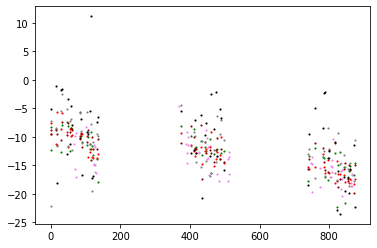

In [27]:
plot_allbands_df(df).show()

<module 'matplotlib.pylab' from '/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/matplotlib/pylab.py'>

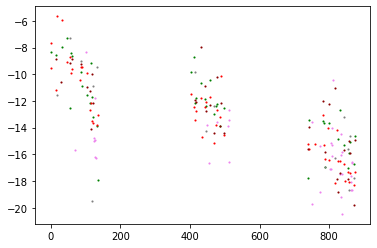

In [28]:
plot_allbands_df(df[df["detected_bool"]==1])

<module 'matplotlib.pylab' from '/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/matplotlib/pylab.py'>

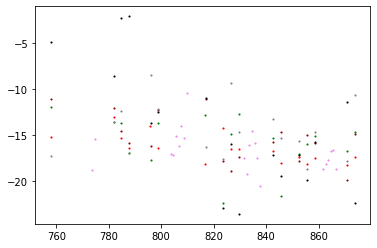

In [29]:
plot_allbands_df(df[df["sid_bool"]==1])

In [30]:
101.6623 - 0.0078

101.6545

In [41]:
df[df["sid_bool"]==1]["ratio"].mean()

8.28073804737199

In [35]:
df[df["detected_bool"]==1]

mjd band       flux   fluxerr  detected_bool  sid_bool      ratio
0      0.0000    r  -7.660913  1.512587              1         0   5.064775
4      1.9841    r  -9.527588  1.073902              1         0   8.871934
5      1.9918    g  -8.355110  1.120871              1         0   7.454123
9     16.8739    r -11.183630  0.891959              1         0  12.538278
10    16.8816    g  -8.550486  0.781694              1         0  10.938406
..        ...  ...        ...       ...            ...       ...        ...
344  870.7657    i -19.821371  1.600399              1         1  12.385268
345  870.7767    z -17.800892  2.587148              1         1   6.880508
347  873.7531    r -17.348915  1.677995              1         1  10.339074
348  873.7607    g -14.606277  2.290154              1         1   6.377858
349  873.7684    i -14.890747  2.192778              1         1   6.790814

[187 rows x 7 columns]

In [14]:
103.8179 - 0.007599999997182749

103.81030000000281

In [15]:
845.7416 - 733.9891999999963

111.7524000000036

In [16]:
111.6798 - 5.906099999992875

105.77370000000712

In [17]:
108.6911 - 5.8908

102.80030000000001

In [18]:
733.9814 - 853.8236

-119.84220000000005

In [19]:
383.0883 - 488.7995

-105.71120000000002

In [20]:
873.7684 - 757.8486

115.91980000000001

In [21]:
858.6171 - 742.8143

115.80280000000005

In [22]:
848.6740 - 745.0028

103.6712